In [1]:
import pandas as pd

import matplotlib

import matplotlib.pyplot as plt

import scipy.stats

from pmdarima import auto_arima

from arch import arch_model

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv('BD preprocesada II.csv',sep=',')
df

,Fecha,AUM FIC,Efectivo,Reserva Bancaria,Del sector privado,Del sector público,Cuentas de ahorro,CDT 1/,Otros depósitos a la vista,Inflación anual %,...,Tasa A 120 días,Tasa Entre 121 y 179 días,Tasa A 180 días,Tasa Entre 181 y 359 días,Tasa A 360 días,Tasa Superiores a 360 días,Tasa Captaciones a través de CDT por red de oficinas,Tasa Captaciones a través de CDT por tesorería,Valor hoy,VALOR
0,2018-01-01,4.277819e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.68,...,0.052668,0.055417,0.052354,0.058845,0.057049,0.061108,0.052959,0.058457,286.55,2940.94
1,2018-01-02,4.346588e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.052668,0.055417,0.052354,0.058845,0.057049,0.061108,0.052959,0.058457,286.55,2940.94
2,2018-01-03,4.427526e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.053122,0.056538,0.054354,0.059277,0.055647,0.065069,0.052840,0.064005,286.55,2940.94
3,2018-01-04,4.457223e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.050867,0.054752,0.053794,0.058336,0.056066,0.066029,0.052695,0.064102,286.55,2908.68
4,2018-01-05,4.464074e+07,58512.003886,28754.777759,35602.554628,10671.094981,170017.348229,160226.125352,5328.184972,3.37,...,0.051841,0.055389,0.054582,0.056345,0.055165,0.062512,0.052718,0.057780,286.55,2885.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,2024-08-03,8.276074e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05
2429,2024-08-04,8.277857e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05
2430,2024-08-05,8.297109e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05
2431,2024-08-06,8.339252e+07,113349.537115,41284.585441,55740.710863,12412.767407,298898.800990,308954.440917,11117.476384,7.16,...,0.100588,0.102314,0.102521,0.106169,0.107774,0.106101,0.100440,0.107696,343.99,4022.05


In [3]:
df.describe()

,AUM FIC,Efectivo,Reserva Bancaria,Del sector privado,Del sector público,Cuentas de ahorro,CDT 1/,Otros depósitos a la vista,Inflación anual %,Tasa de intervención de política monetaria (%),...,Tasa A 120 días,Tasa Entre 121 y 179 días,Tasa A 180 días,Tasa Entre 181 y 359 días,Tasa A 360 días,Tasa Superiores a 360 días,Tasa Captaciones a través de CDT por red de oficinas,Tasa Captaciones a través de CDT por tesorería,Valor hoy,VALOR
count,2.433000e+03,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,...,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000
mean,5.633188e+07,86203.627547,33738.555512,49844.399310,12803.619555,239975.138435,198758.678348,7349.839857,5.965347,6.185265,...,0.064717,0.068542,0.068098,0.072869,0.075914,0.080914,0.065666,0.077793,297.144640,3728.836206
std,9.769814e+06,20831.522177,3600.467803,10211.729539,1422.454137,47067.688243,52699.749408,2288.956686,3.721317,4.171239,...,0.040276,0.041010,0.042415,0.042591,0.044383,0.044699,0.040106,0.046287,23.717714,524.614985
min,3.677861e+07,51354.362145,25816.691856,32417.368957,9575.669280,162616.666926,151391.703449,4153.429974,1.490000,1.750000,...,0.015305,0.013594,0.018205,0.021725,0.020618,0.022148,0.017256,0.018460,233.470000,2705.340000
25%,4.932364e+07,63102.727839,30762.674576,38474.828151,11782.417586,186323.841020,165090.020592,5291.950386,3.180000,3.000000,...,0.038865,0.041783,0.041745,0.046352,0.049150,0.052657,0.040024,0.049307,286.550000,3325.470000
50%,5.335942e+07,92723.230799,33396.122081,53053.536212,12682.925004,253647.970575,172132.365456,6696.865135,3.860000,4.250000,...,0.046444,0.049138,0.047500,0.051785,0.053525,0.058260,0.046710,0.055056,288.870000,3777.170000
75%,6.288319e+07,104792.107414,36676.898397,57685.958011,13592.945145,285972.969568,221719.133594,9233.044964,9.230000,11.000000,...,0.103723,0.105918,0.106728,0.110959,0.112027,0.117289,0.103418,0.114892,311.270000,4011.650000
max,8.339252e+07,116163.959295,41829.739924,68111.005112,17744.070293,301162.158516,308954.440917,16039.521727,13.340000,13.250000,...,0.165307,0.184264,0.185429,0.188228,0.187187,0.223516,0.155275,0.212405,523.100000,5061.210000


In [4]:
df.isna().sum()

Fecha                                                   0
AUM FIC                                                 0
Efectivo                                                0
Reserva Bancaria                                        0
Del sector privado                                      0
Del sector público                                      0
Cuentas de ahorro                                       0
CDT 1/                                                  0
Otros depósitos a la vista                              0
Inflación anual %                                       0
Tasa de intervención de política monetaria (%)          0
Tasa 30 días                                            0
Tasa Entre 31 y 44 días                                 0
Tasa A 45 días                                          0
Tasa Entre 46 y 59 días                                 0
Tasa A 60 días                                          0
Tasa Entre 61 y 89 días                                 0
Tasa A 90 días

No se encuentran valores faltantes, puesto que en el procesamiento se trataron este tipo de valores

In [5]:
# Formatear columna Fecha como datetime

df['Fecha'] = pd.to_datetime(df['Fecha'])

In [6]:
# Crear columna con el año

df['Año'] = pd.to_datetime(df['Fecha']).dt.to_period('Y')

df['Año'] = df['Año'].astype(str)

# Crear columna con mes

df['Mes'] = pd.to_datetime(df['Fecha']).dt.month

# Crear columna con día

df['dia'] = pd.to_datetime(df['Fecha']).dt.day

In [7]:
# Fecha como índice

df.set_index('Fecha',inplace=True)

Text(0.5, 1.0, 'AUM FIC Enero 2018 - Agosto 2024  ')

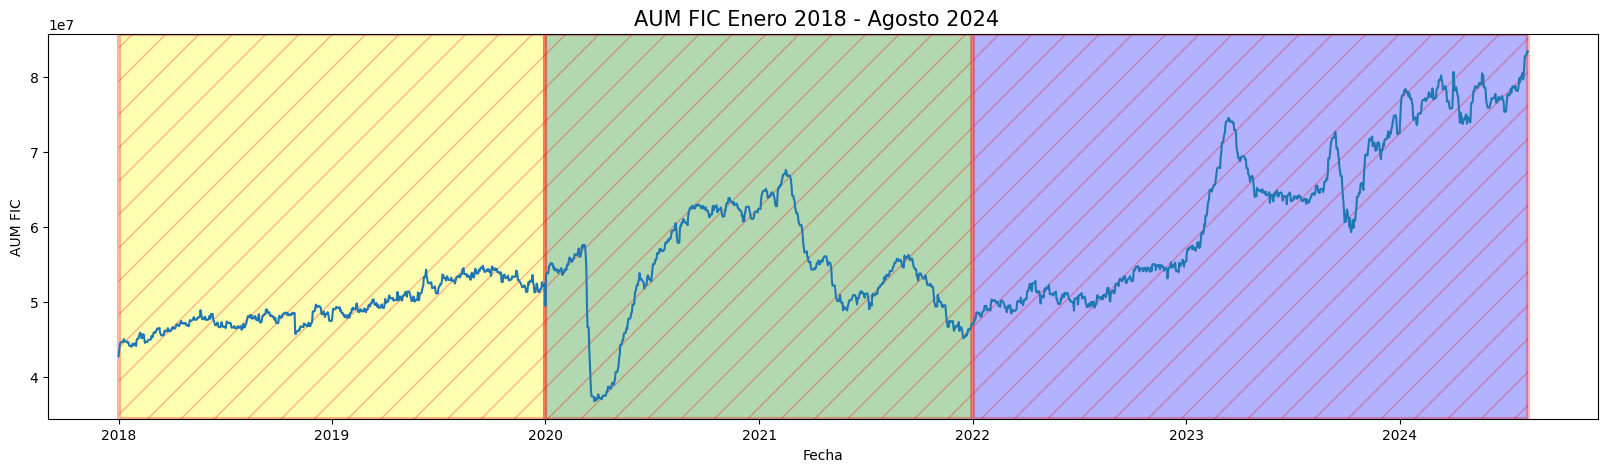

In [8]:
plt.figure(figsize=(20,5))

plt.plot(df['AUM FIC'])

plt.axvspan('2018-01-01', '2019-12-31', facecolor='yellow', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.axvspan('2020-01-01', '2021-12-31', facecolor='green', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.axvspan('2022-01-01', '2024-08-07', facecolor='blue', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.xlabel('Fecha', fontsize=10)

plt.ylabel('AUM FIC', fontsize=10)

plt.title('AUM FIC Enero 2018 - Agosto 2024  ',size = 15)

In [9]:
# Crear un dataframe filtrando por año

year_2018 = df[df['Año'] == '2018']

year_2019 = df[df['Año'] == '2019']

year_2020 = df[df['Año'] == '2020']

year_2021= df[df['Año'] == '2021']

year_2022 = df[df['Año'] == '2022']

year_2023 = df[df['Año'] == '2023']

year_2024 = df[df['Año'] == '2024']

### Graficar serie temporal de AUM

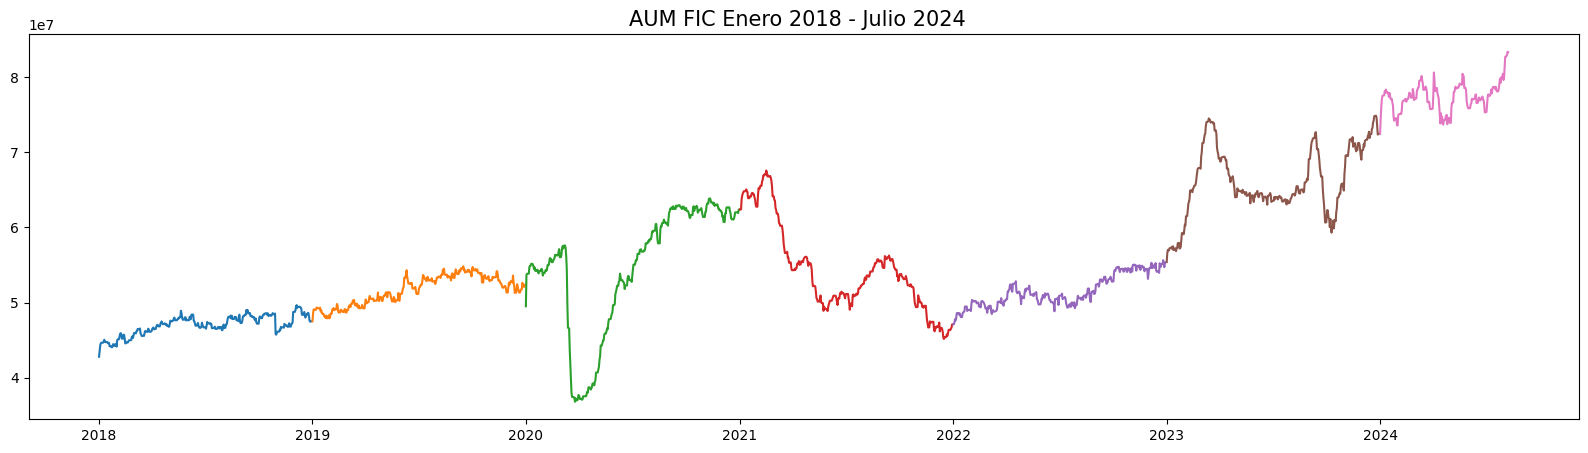

In [10]:
plt.figure(figsize=(20,5))

plt.plot(year_2018['AUM FIC'])

plt.plot(year_2019['AUM FIC'])

plt.plot(year_2020['AUM FIC'])

plt.plot(year_2021['AUM FIC'])

plt.plot(year_2022['AUM FIC'])

plt.plot(year_2023['AUM FIC'])

plt.plot(year_2024['AUM FIC'])

plt.title('AUM FIC Enero 2018 - Julio 2024  ',size = 15)

plt.show()

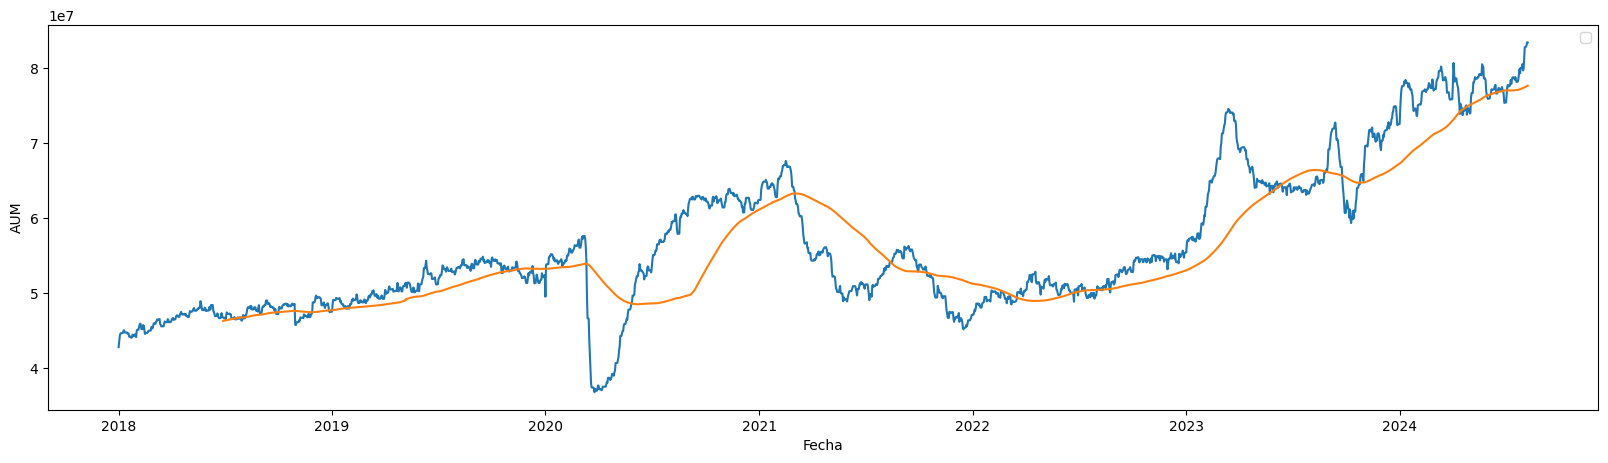

In [14]:
# Copia de dataframe
time = df.copy()

# Calcular media móvil de 100 días

sma = time['AUM FIC'].rolling(window=180).mean()

# Graficar con media móvil

plt.figure(figsize=(20,5))

plt.legend(['a','b'])

plt.plot(time['AUM FIC'])

plt.xlabel('Fecha', fontsize=10)

plt.ylabel('AUM', fontsize=10)

plt.plot(sma)

# plt.legend(True)

plt.show()

#### Graficar por año

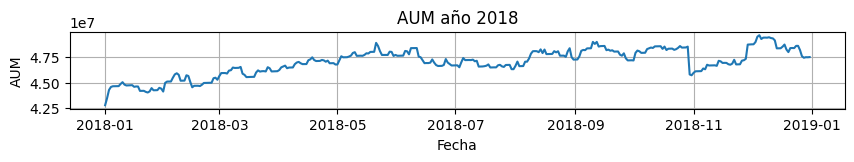

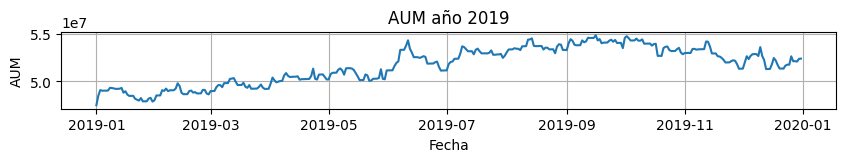

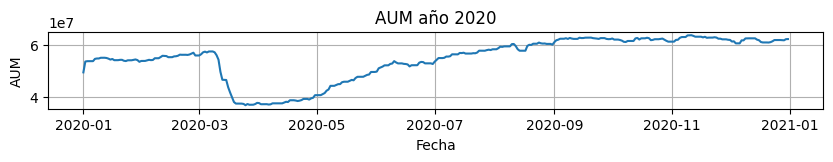

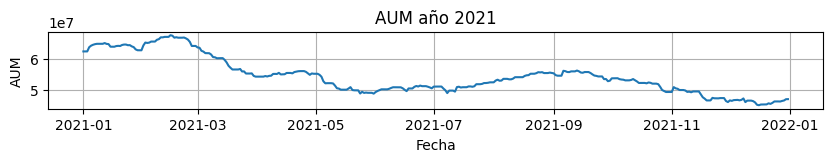

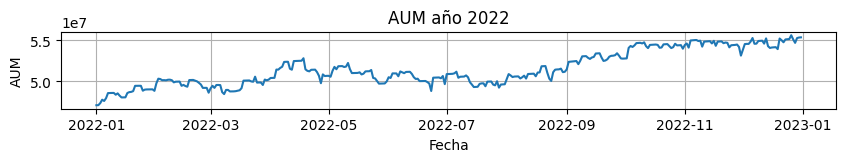

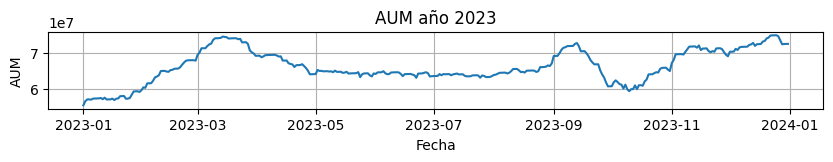

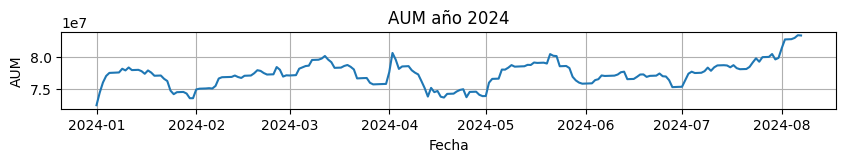

In [13]:
# Obtener los años únicos en el DataFrame

years = df['Año'].unique()

# Crear un gráfico separado para cada año
for year in years:
    df_year = df[df['Año'] == year]
    
    plt.figure(figsize=(10, 1))
    plt.plot(df_year['AUM FIC'])
    
    # Añadir títulos y etiquetas
    plt.title(f'AUM año {year}')
    plt.xlabel('Fecha')
    plt.ylabel('AUM')
    
    # Mostrar el gráfico
    plt.grid(True)
    plt.show()

Text(0.5, 1.0, 'AUM FIC promedio por mes')

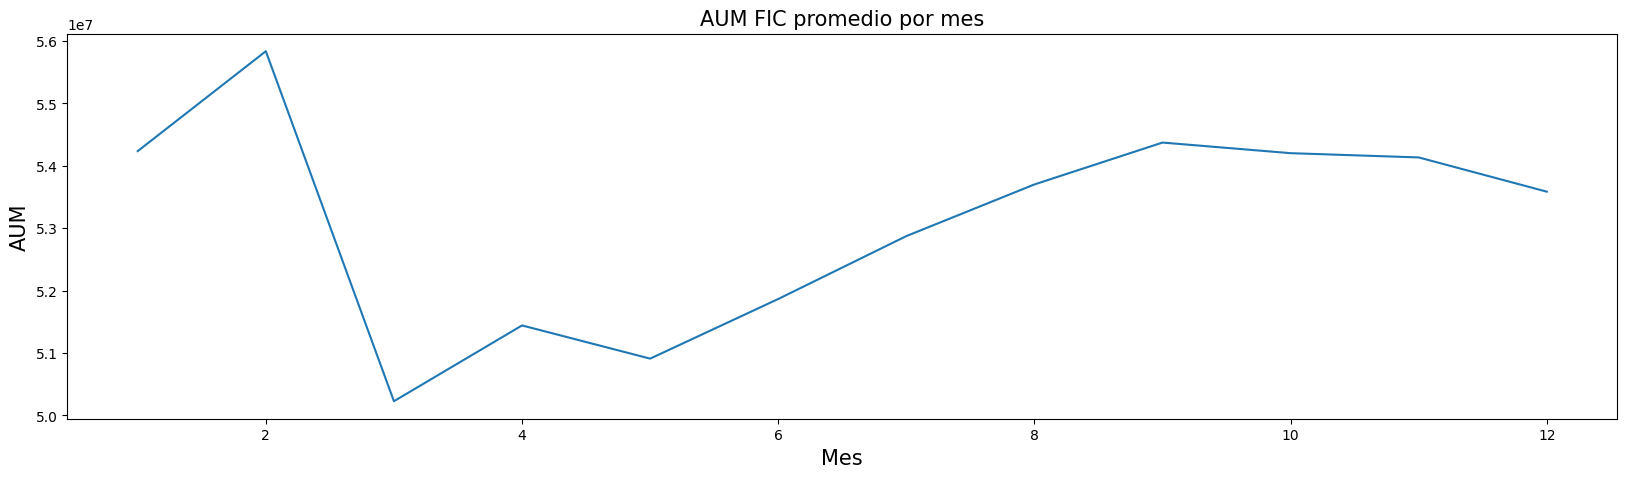

In [15]:
# Seleccionar columnas

time = time[['AUM FIC','Año','Mes','dia']]

agrupado_2 = time.groupby(['Mes'])['AUM FIC'].median().reset_index()

# Fecha como índice

agrupado_2.set_index('Mes',inplace=True)

# Graficar AUM promedio por mes

plt.figure(figsize=(20,5))

plt.plot(agrupado_2)

plt.xlabel('Mes', fontsize=15)

plt.ylabel('AUM', fontsize=15)

plt.title('AUM FIC promedio por mes',size = 15)


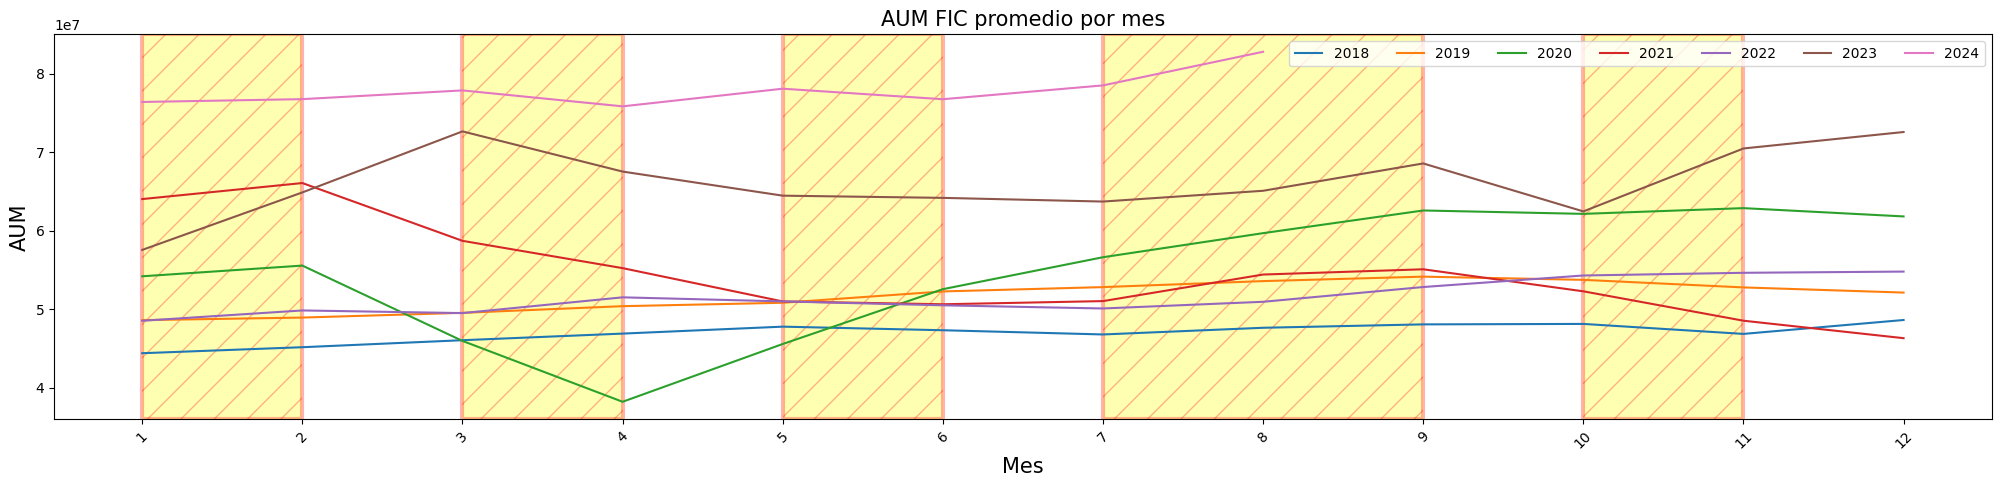

In [16]:
# Agrupar por año y mes y mediana del AUM

agrupado = time.groupby(['Año','Mes'])['AUM FIC'].mean().reset_index()

# Pivotear tabla

agrupado = agrupado.pivot(index='Mes',columns='Año',values='AUM FIC')

# Graficar AUM promedio por mes

plt.figure(figsize=(25,5))

plt.plot(agrupado)

plt.legend(agrupado.columns,ncol = 7)

plt.xlabel('Mes', fontsize=15)

plt.ylabel('AUM', fontsize=15)

plt.xticks(list(agrupado.index), rotation=45)

plt.title('AUM FIC promedio por mes',size = 15)

plt.axvspan(3, 4, facecolor='yellow', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.axvspan(1, 2, facecolor='yellow', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.axvspan(5, 6, facecolor='yellow', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.axvspan(7, 9, facecolor='yellow', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.axvspan(10, 11, facecolor='yellow', alpha=0.3, hatch='/', edgecolor='red', linewidth=3)

plt.show()

### QQ Plot

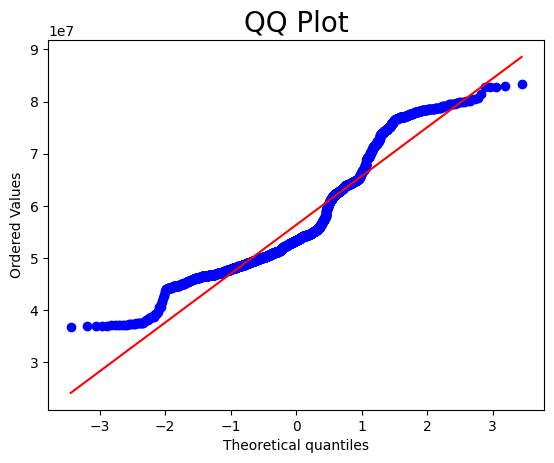

In [129]:
scipy.stats.probplot(df['AUM FIC'],plot=plt)

plt.title('QQ Plot',size = 20)

plt.show()

No hay distribución normal de los datos

###  Estacionariedad - Test de Dickey Fuller

In [130]:
import statsmodels.tsa.stattools as sts

Contraste de hipótesis para comprobar la estacionariedad de la serie, hipótesis nula, la serie no es estacionaria

In [131]:
sts.adfuller(df['AUM FIC'])

(-1.0569790205615528,
 0.731919885802179,
 15,
 2394,
 {'1%': -3.433084471827723,
  '5%': -2.862748051618385,
  '10%': -2.5674130966374444},
 68709.41619310138)

La hipótesis nula no se rechaza, es decir la serie no es estacionaria, estadístico de -1.12, es mayor a los valores críticos a un valor de confianza del 99% (-3.43), del 95% (-2.86) y del 90% (-2.57), además el p-valor de 0.59 es mayor que los niveles de significancia.

El número de retrasos es de 15 para encontrar una correlación, es decir 15 días atrás se encuentra una correlación.

#### Analizando estacionariedad por años

In [132]:
sts.adfuller(year_2018['AUM FIC'])

(-3.3957046280479455,
 0.011106174992441327,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 9716.988651155425)

2018 presenta estacionariedad

In [133]:
sts.adfuller(year_2019['AUM FIC'])

(-1.6850887070921994,
 0.43881113518842596,
 17,
 347,
 {'1%': -3.449336554273722,
  '5%': -2.8699055166063085,
  '10%': -2.571226758215748},
 9796.395529649559)

Para 2019 no hay estacionariedad

In [134]:
sts.adfuller(year_2020['AUM FIC'])

(-1.406587077355026,
 0.5791141484135773,
 6,
 359,
 {'1%': -3.4486972813047574,
  '5%': -2.8696246923288418,
  '10%': -2.571077032068342},
 10075.526555316552)

Para 2020 no hay estacionariedad

In [135]:
sts.adfuller(year_2021['AUM FIC'])

(-0.9150093571204071,
 0.7829894444889953,
 1,
 363,
 {'1%': -3.448493650810824,
  '5%': -2.8695352280356556,
  '10%': -2.5710293341377715},
 9910.224607050626)

In [136]:
sts.adfuller(year_2022['AUM FIC'])

(-1.5470679970306374,
 0.5101124362956745,
 2,
 362,
 {'1%': -3.448544133483233,
  '5%': -2.8695574079525565,
  '10%': -2.5710411593052713},
 9901.904939433176)

2021 y 2022 tampoco muestra estacionariedad

In [137]:
sts.adfuller(year_2023['AUM FIC'])

(-3.500139233071845,
 0.007983518981224468,
 14,
 350,
 {'1%': -3.4491725955218655,
  '5%': -2.8698334971428574,
  '10%': -2.5711883591836733},
 10108.453958864358)

2023 muestra estacionariedad

In [138]:
sts.adfuller(year_2024['AUM FIC'])

(-1.6584847632219122,
 0.4526192136483204,
 12,
 206,
 {'1%': -3.4624988216864776,
  '5%': -2.8756749365852587,
  '10%': -2.5743041549627677},
 5971.060461661799)

2024 no muestra estacionariedad

### Estacionalidad

In [139]:
from statsmodels.tsa.seasonal import seasonal_decompose

#### Aditiva

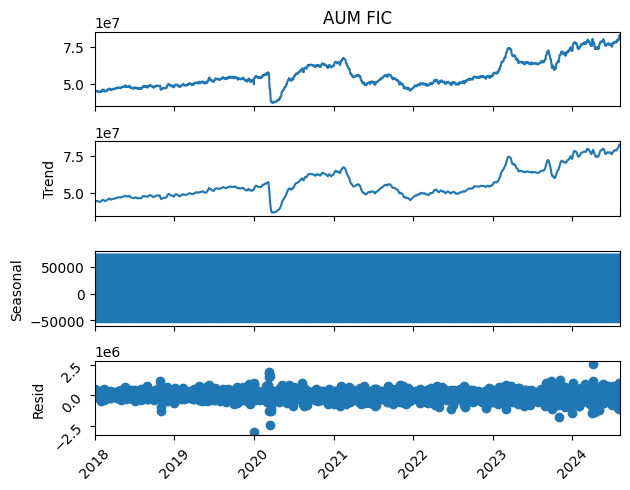

<Figure size 4000x500 with 0 Axes>

In [140]:
desc_aditiva = seasonal_decompose(df['AUM FIC'],model='additive')

desc_aditiva.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

El gráfico sugiere que no hay estacionalidad en los datos, además que los residuos son más grandes en el primer trimestre de 2020 (que presenta una caída de los activos efecto de la pandemia), así como el primer trimestre de 2024, que coincide con una de las caídas más fuertes de este año

Haciendo un análisis de estacionalidad por año se encuentra que para cada año hay estacionalidad, lo que no se ve cuando se observa la serie completa

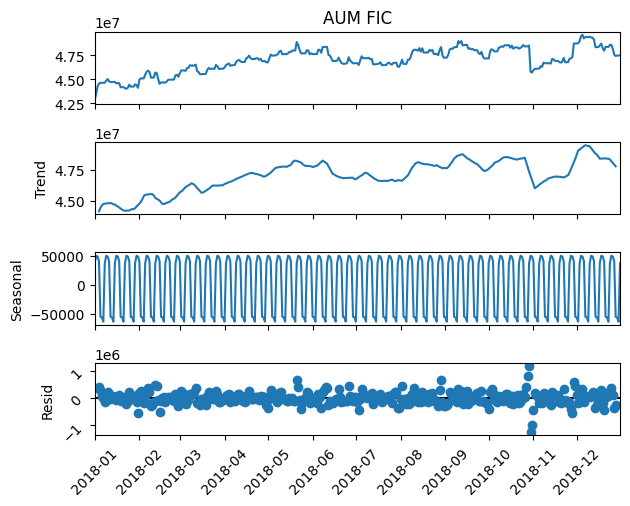

<Figure size 4000x500 with 0 Axes>

In [28]:
desc_aditiva_2018 = seasonal_decompose(year_2018['AUM FIC'],model='additive')

desc_aditiva_2018.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

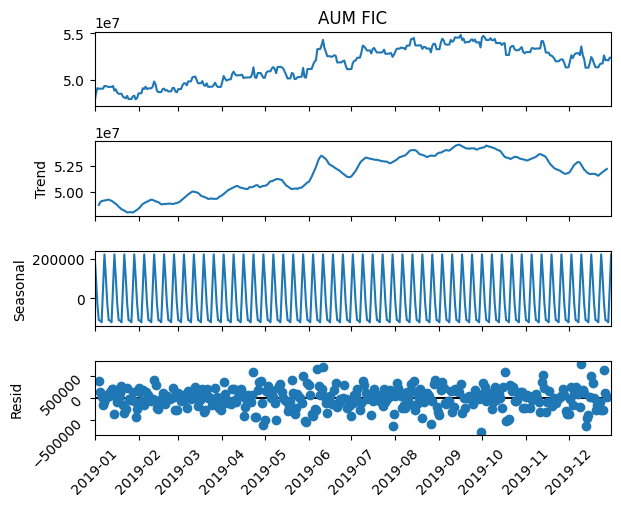

<Figure size 4000x500 with 0 Axes>

In [29]:
desc_aditiva_2019 = seasonal_decompose(year_2019['AUM FIC'],model='additive')

desc_aditiva_2019.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

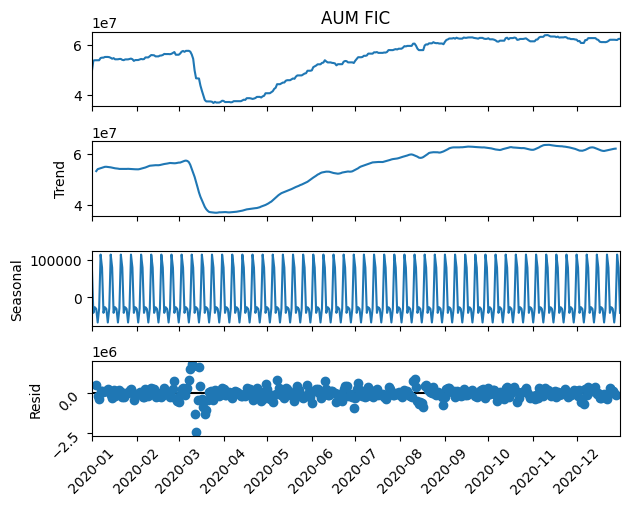

<Figure size 4000x500 with 0 Axes>

In [30]:
desc_aditiva_2020 = seasonal_decompose(year_2020['AUM FIC'],model='additive')

desc_aditiva_2020.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

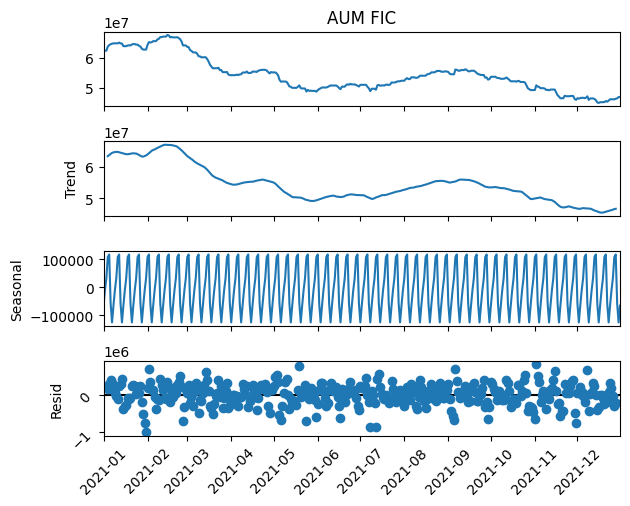

<Figure size 4000x500 with 0 Axes>

In [31]:
desc_aditiva_2021 = seasonal_decompose(year_2021['AUM FIC'],model='additive')

desc_aditiva_2021.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

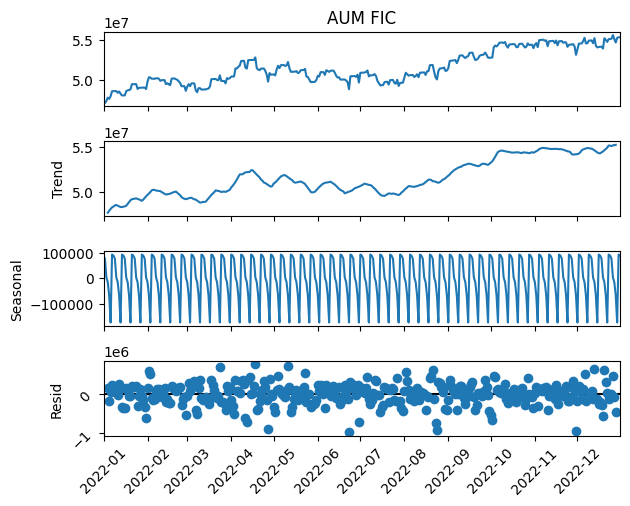

<Figure size 4000x500 with 0 Axes>

In [32]:
desc_aditiva_2022 = seasonal_decompose(year_2022['AUM FIC'],model='additive')

desc_aditiva_2022.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

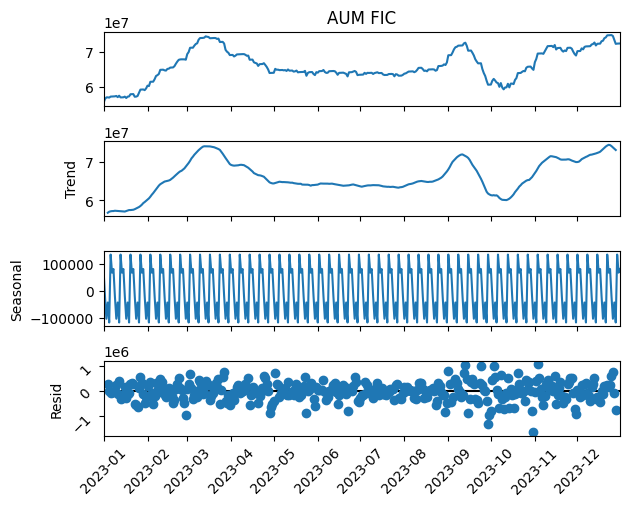

<Figure size 4000x500 with 0 Axes>

In [33]:
desc_aditiva_2023 = seasonal_decompose(year_2023['AUM FIC'],model='additive')

desc_aditiva_2023.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

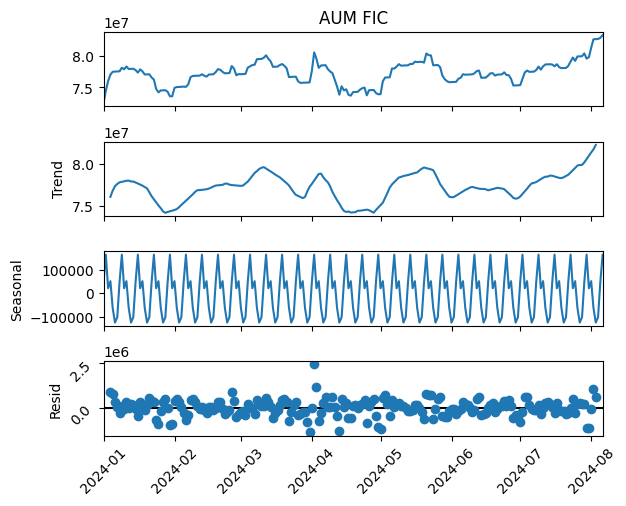

<Figure size 4000x500 with 0 Axes>

In [34]:
desc_aditiva_2024 = seasonal_decompose(year_2024['AUM FIC'],model='additive')

desc_aditiva_2024.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

#### Multiplicativa

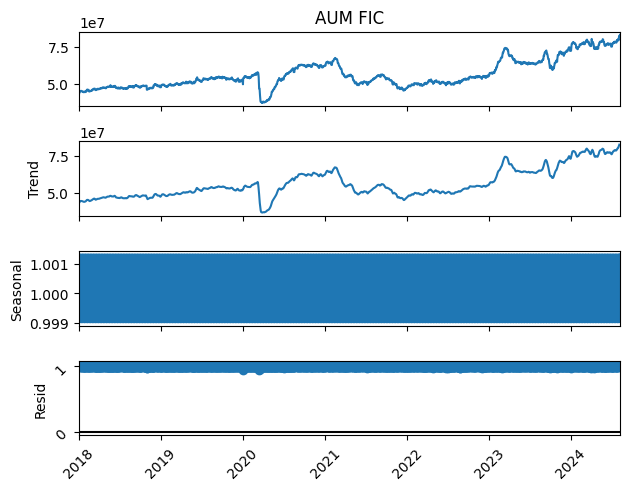

<Figure size 4000x500 with 0 Axes>

In [35]:
desc_multiplicative = seasonal_decompose(df['AUM FIC'],model='multiplicative')

desc_multiplicative.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

Observando la serie completa no se muestra una estacionalidad evidente. Sin embargo, al analizar la serie por periodos más cortos como los años, si se comienza a notar cierta estacionalidad.

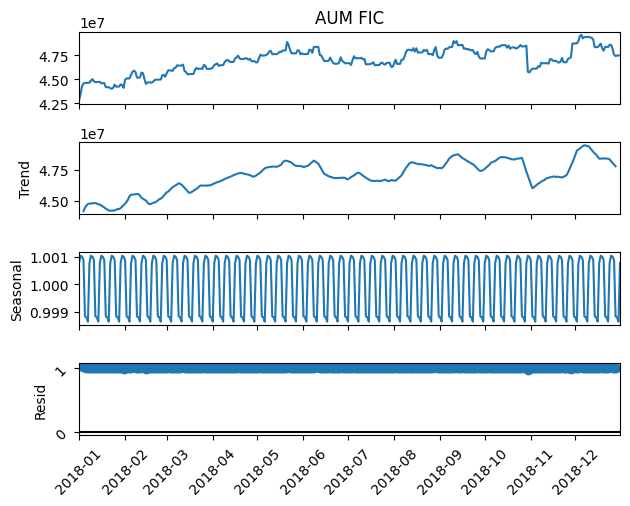

<Figure size 4000x500 with 0 Axes>

In [36]:
desc_multiplicative_2018 = seasonal_decompose(year_2018['AUM FIC'],model='multiplicative')

desc_multiplicative_2018.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

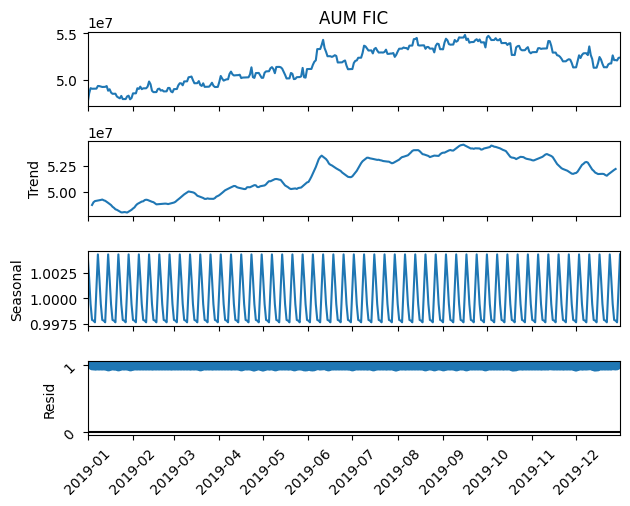

<Figure size 4000x500 with 0 Axes>

In [37]:
desc_multiplicative_2019 = seasonal_decompose(year_2019['AUM FIC'],model='multiplicative')

desc_multiplicative_2019.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

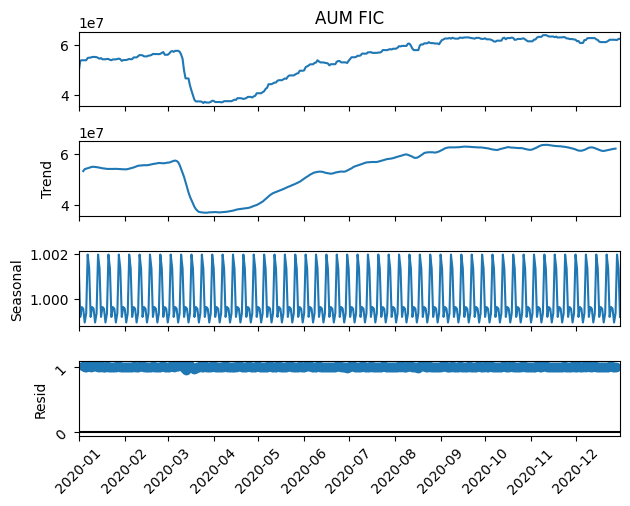

<Figure size 4000x500 with 0 Axes>

In [38]:
desc_multiplicative_2020 = seasonal_decompose(year_2020['AUM FIC'],model='multiplicative')

desc_multiplicative_2020.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

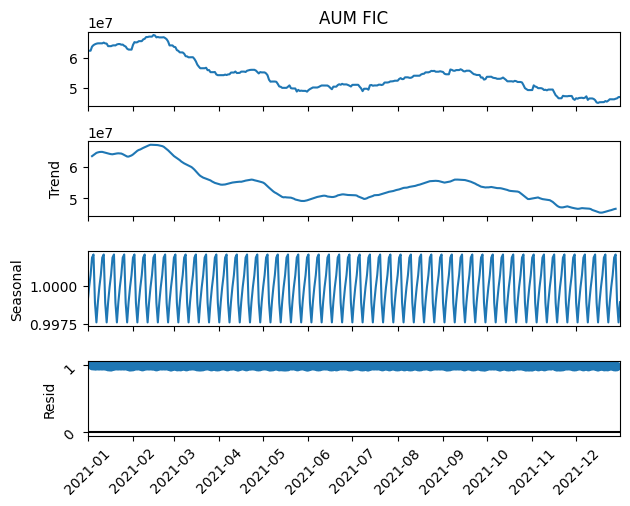

<Figure size 4000x500 with 0 Axes>

In [39]:
desc_multiplicative_2021 = seasonal_decompose(year_2021['AUM FIC'],model='multiplicative')

desc_multiplicative_2021.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

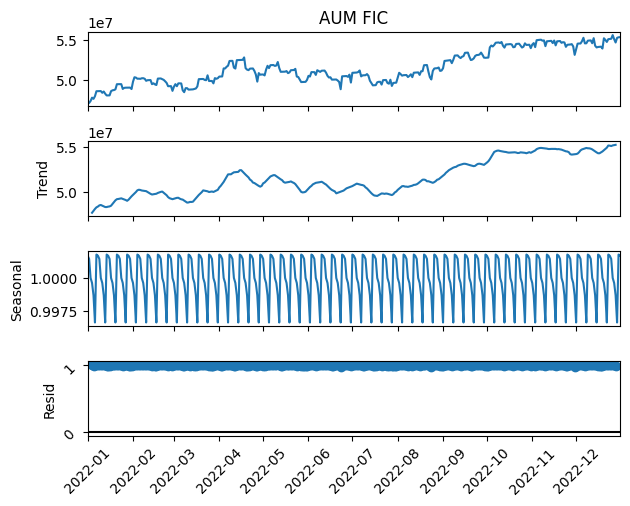

<Figure size 4000x500 with 0 Axes>

In [40]:
desc_multiplicative_2022 = seasonal_decompose(year_2022['AUM FIC'],model='multiplicative')

desc_multiplicative_2022.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

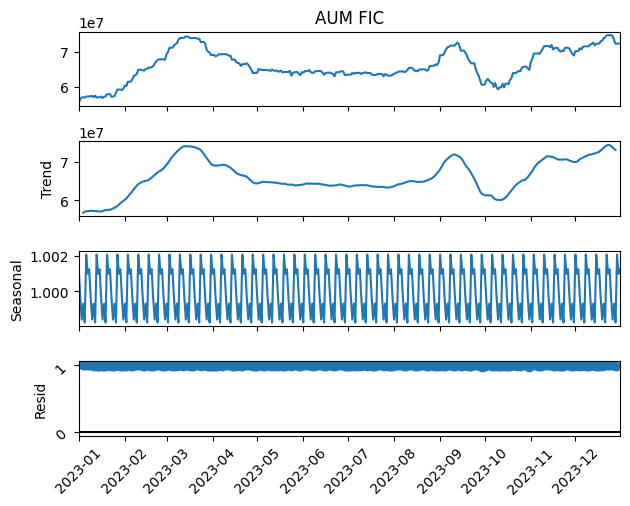

<Figure size 4000x500 with 0 Axes>

In [41]:
desc_multiplicative_2023 = seasonal_decompose(year_2023['AUM FIC'],model='multiplicative')

desc_multiplicative_2023.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

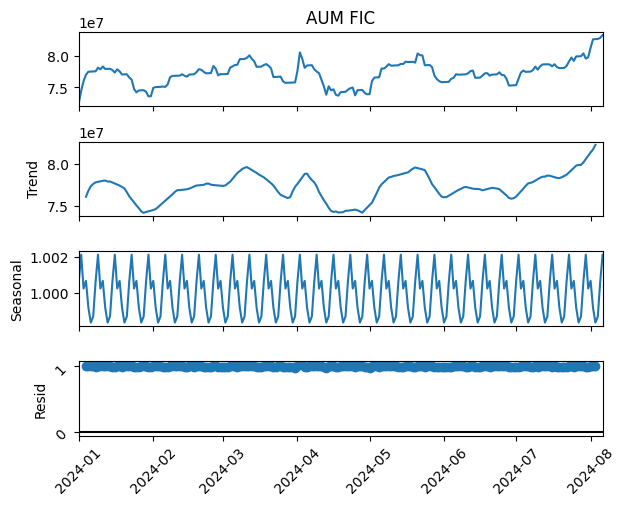

<Figure size 4000x500 with 0 Axes>

In [42]:
desc_multiplicative_2024 = seasonal_decompose(year_2024['AUM FIC'],model='multiplicative')

desc_multiplicative_2024.plot()

plt.tick_params(labelrotation = 45)

plt.figure(figsize=(40,5))

plt.show()

## Autocorrelación

In [18]:
import statsmodels.graphics.tsaplots as sgt

<Figure size 2000x500 with 0 Axes>

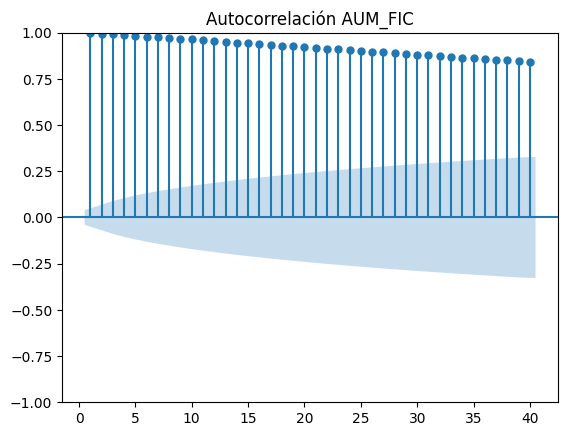

In [44]:
plt.figure(figsize=(20,5))

sgt.plot_acf(df['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

Los valores de AUM están autocorrelacionados, aún a 40 días atrás, lo que indica que un AUM de hace 40 días tiene relación con el valor actual, lo que es importante para definir una ventana de pronóstico.

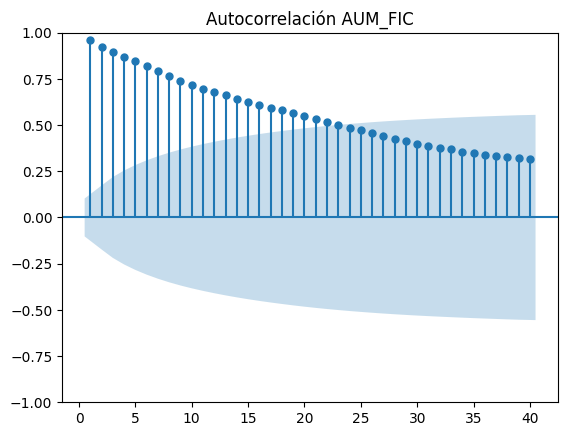

In [45]:
sgt.plot_acf(year_2018['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

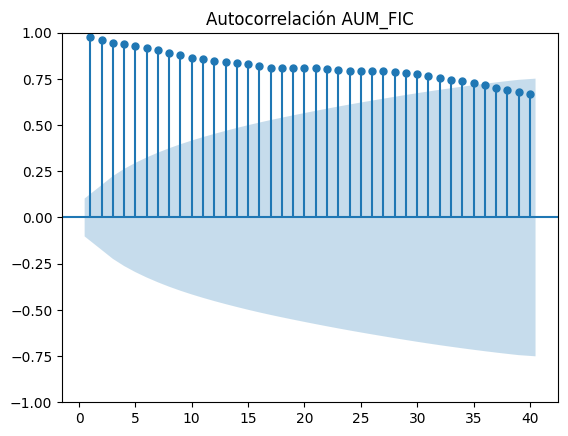

In [46]:
sgt.plot_acf(year_2019['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

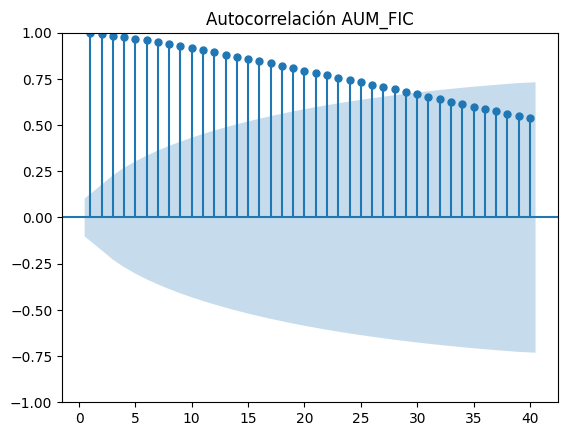

In [47]:
sgt.plot_acf(year_2020['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

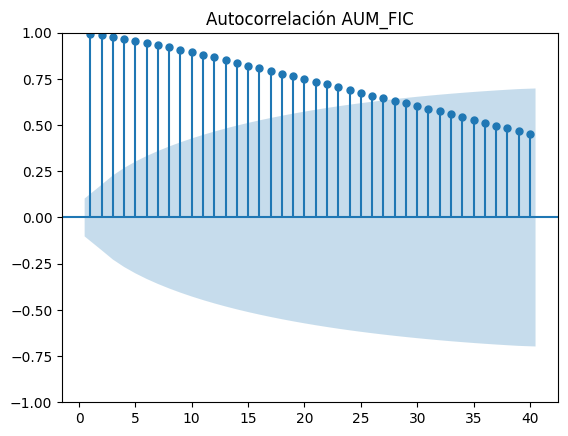

In [48]:
sgt.plot_acf(year_2021['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

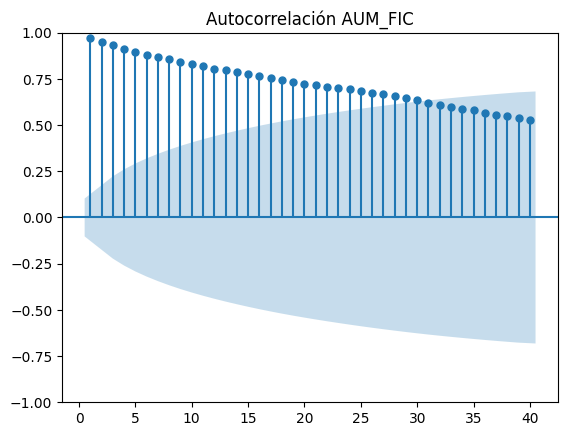

In [49]:
sgt.plot_acf(year_2022['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

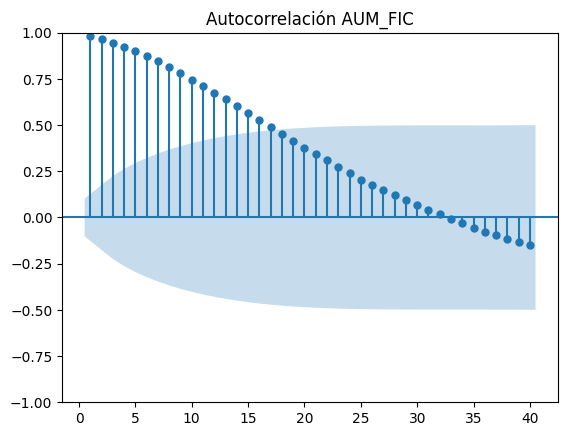

In [50]:
sgt.plot_acf(year_2023['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

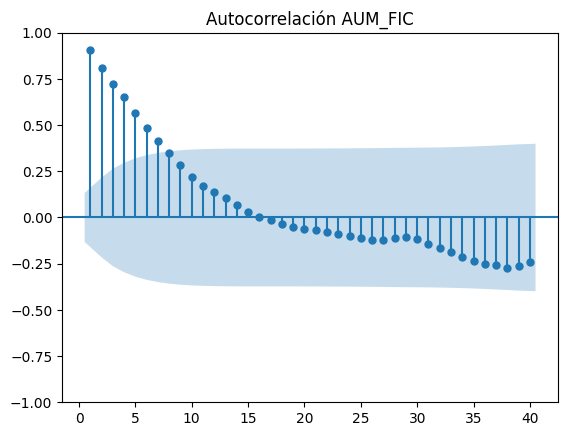

In [51]:
sgt.plot_acf(year_2024['AUM FIC'],lags=40,zero=False)

plt.title('Autocorrelación AUM_FIC')

plt.show()

### Autocorrelación parcial

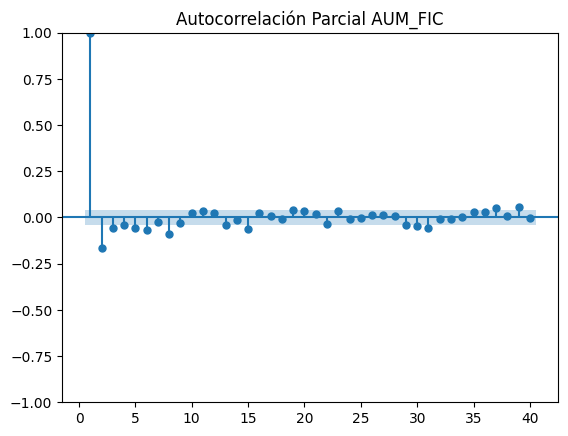

In [19]:
sgt.plot_pacf(df['AUM FIC'],lags=40,zero=False,method='ols')

plt.title('Autocorrelación Parcial AUM_FIC')

plt.show()

El AUM de hoy tiene correlación con los últimos 8 días, de una forma negativa, indicando que despúes de una caída de una semana viene un aumento.

In [53]:
df_principal = df[['AUM FIC']]

# df_principal = df_principal.diff().dropna()

# df_principal

In [54]:
# sts.adfuller(df_principal['AUM FIC'])

## Modelo Autoregresivo

Con un retraso

In [55]:
from statsmodels.tsa.arima.model import ARIMA

In [56]:
model_ar = ARIMA(df_principal['AUM FIC'],order = (1,0,0))

results_ar = model_ar.fit()

results_ar.summary()

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34809.907
Date:                Sat, 17 Aug 2024   AIC                          69625.814
Time:                        12:36:56   BIC                          69643.176
Sample:                    01-01-2018   HQIC                         69632.129
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   1.39e-14   4.05e+21      0.000    5.63e+07    5.63e+07
ar.L1          0.9995      0.001   1220.814      0.000       0.998       1.001
sigma2      2.052e+11   4.69e-17   4.38e+27      0.000    2.05e+11    2.05e+11
===================================================================================
Ljung-Box (L1) (Q):                  66.15   Jarque-Bera (JB):             17916.58
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.8e+41. Standard errors may be unstable.
"""

La constante y el coeficiente son significativos porque el p valor es menor al nivel de confianza del 95%.

#### Con dos retrasos

In [57]:
model_ar_2 = ARIMA(df_principal,order = (2,0,0))

results_ar_2 = model_ar_2.fit()

results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -34775.877
Date:                Sat, 17 Aug 2024   AIC                          69559.754
Time:                        12:36:56   BIC                          69582.904
Sample:                    01-01-2018   HQIC                         69568.174
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   1.25e-12   4.52e+19      0.000    5.63e+07    5.63e+07
ar.L1          1.1669      0.008    137.358      0.000       1.150       1.184
ar.L2         -0.1671      0.009    -19.546      0.000      -0.184      -0.150
sigma2      1.993e+11   3.93e-15   5.07e+25      0.000    1.99e+11    1.99e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):             18391.67
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.96e+41. Standard errors may be unstable.
"""

#### Con tres retrasos

In [58]:
model_ar_3 = ARIMA(df_principal['AUM FIC'],order = (3,0,0))

results_ar_3 = model_ar_3.fit()

results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34772.011
Date:                Sat, 17 Aug 2024   AIC                          69554.022
Time:                        12:36:57   BIC                          69582.959
Sample:                    01-01-2018   HQIC                         69564.547
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   2.31e-12   2.44e+19      0.000    5.63e+07    5.63e+07
ar.L1          1.1576      0.009    122.879      0.000       1.139       1.176
ar.L2         -0.1019      0.022     -4.608      0.000      -0.145      -0.059
ar.L3         -0.0560      0.016     -3.410      0.001      -0.088      -0.024
sigma2      1.986e+11   9.98e-14   1.99e+24      0.000    1.99e+11    1.99e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             17843.97
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+39. Standard errors may be unstable.
"""

#### Con 4 retrasos

In [59]:
model_ar_4 = ARIMA(df_principal['AUM FIC'],order = (4,0,0))

results_ar_4 = model_ar_4.fit()

results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34769.453
Date:                Sat, 17 Aug 2024   AIC                          69550.905
Time:                        12:36:57   BIC                          69585.629
Sample:                    01-01-2018   HQIC                         69563.535
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   6.39e-12   8.81e+18      0.000    5.63e+07    5.63e+07
ar.L1          1.1551      0.009    122.582      0.000       1.137       1.174
ar.L2         -0.1065      0.023     -4.715      0.000      -0.151      -0.062
ar.L3         -0.0035      0.027     -0.131      0.896      -0.056       0.049
ar.L4         -0.0455      0.016     -2.833      0.005      -0.077      -0.014
sigma2      1.983e+11   6.24e-14   3.18e+24      0.000    1.98e+11    1.98e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             17468.67
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.37e+40. Standard errors may be unstable.
"""

Se comparan los dos modelos a través de una tabla de hipótesis con el fin  de verificar si los dos modelos son significativamente diferentes y así verificar si adicionar complejidad al modelo vale o no la pena, partiendo que la hipótesis nula es que los dos modelos son significativamente similares

#### Con 5 retrasos

In [60]:
model_ar_5 = ARIMA(df_principal['AUM FIC'],order = (5,0,0))

results_ar_5 = model_ar_5.fit()

results_ar_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -34765.349
Date:                Sat, 17 Aug 2024   AIC                          69544.698
Time:                        12:36:57   BIC                          69585.210
Sample:                    01-01-2018   HQIC                         69559.433
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07    5.6e-12   1.01e+19      0.000    5.63e+07    5.63e+07
ar.L1          1.1525      0.010    121.094      0.000       1.134       1.171
ar.L2         -0.1067      0.023     -4.645      0.000      -0.152      -0.062
ar.L3         -0.0096      0.031     -0.314      0.754      -0.069       0.050
ar.L4          0.0213      0.031      0.678      0.498      -0.040       0.083
ar.L5         -0.0580      0.016     -3.660      0.000      -0.089      -0.027
sigma2      1.977e+11   9.34e-14   2.12e+24      0.000    1.98e+11    1.98e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):             17249.84
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.15e+39. Standard errors may be unstable.
"""

#### Con 6 retrasos

In [61]:
model_ar_6 = ARIMA(df_principal['AUM FIC'],order = (6,0,0))

results_ar_6 = model_ar_6.fit()

results_ar_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -34760.281
Date:                Sat, 17 Aug 2024   AIC                          69536.561
Time:                        12:36:58   BIC                          69582.860
Sample:                    01-01-2018   HQIC                         69553.402
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07    5.6e-12   1.01e+19      0.000    5.63e+07    5.63e+07
ar.L1          1.1488      0.010    120.623      0.000       1.130       1.167
ar.L2         -0.1053      0.023     -4.546      0.000      -0.151      -0.060
ar.L3         -0.0102      0.031     -0.330      0.742      -0.071       0.050
ar.L4          0.0145      0.033      0.443      0.657      -0.049       0.078
ar.L5          0.0164      0.030      0.547      0.584      -0.042       0.075
ar.L6         -0.0648      0.019     -3.495      0.000      -0.101      -0.028
sigma2      1.969e+11   9.96e-14   1.98e+24      0.000    1.97e+11    1.97e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             17456.42
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.42e+39. Standard errors may be unstable.
"""

#### Con 7 retrasos

In [62]:
model_ar_7 = ARIMA(df_principal['AUM FIC'],order = (7,0,0))

results_ar_7 = model_ar_7.fit()

results_ar_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -34759.079
Date:                Sat, 17 Aug 2024   AIC                          69536.158
Time:                        12:36:58   BIC                          69588.244
Sample:                    01-01-2018   HQIC                         69555.103
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   6.77e-12   8.32e+18      0.000    5.63e+07    5.63e+07
ar.L1          1.1468      0.010    119.766      0.000       1.128       1.166
ar.L2         -0.1048      0.023     -4.493      0.000      -0.151      -0.059
ar.L3         -0.0098      0.031     -0.313      0.754      -0.071       0.051
ar.L4          0.0141      0.033      0.432      0.666      -0.050       0.078
ar.L5          0.0133      0.030      0.440      0.660      -0.046       0.072
ar.L6         -0.0287      0.028     -1.040      0.299      -0.083       0.025
ar.L7         -0.0316      0.016     -2.010      0.044      -0.062      -0.001
sigma2      1.968e+11   1.11e-13   1.78e+24      0.000    1.97e+11    1.97e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             17927.40
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.47e+39. Standard errors may be unstable.
"""

#### Con 8 retrasos

In [63]:
model_ar_8 = ARIMA(df_principal['AUM FIC'],order = (8,0,0))

results_ar_8 = model_ar_8.fit()

results_ar_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -34749.185
Date:                Sat, 17 Aug 2024   AIC                          69518.370
Time:                        12:36:59   BIC                          69576.244
Sample:                    01-01-2018   HQIC                         69539.420
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   1.01e-11   5.59e+18      0.000    5.63e+07    5.63e+07
ar.L1          1.1439      0.010    115.172      0.000       1.124       1.163
ar.L2         -0.1073      0.024     -4.425      0.000      -0.155      -0.060
ar.L3         -0.0085      0.031     -0.273      0.785      -0.070       0.053
ar.L4          0.0153      0.033      0.460      0.646      -0.050       0.081
ar.L5          0.0124      0.030      0.409      0.683      -0.047       0.072
ar.L6         -0.0377      0.028     -1.351      0.177      -0.092       0.017
ar.L7          0.0719      0.024      2.963      0.003       0.024       0.119
ar.L8         -0.0908      0.016     -5.704      0.000      -0.122      -0.060
sigma2      1.953e+11   1.34e-13   1.45e+24      0.000    1.95e+11    1.95e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             17543.34
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.54   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.51e+38. Standard errors may be unstable.
"""

In [64]:
from  scipy.stats.distributions import chi2

In [65]:
# Definir función de 

def LLR_test(mod_1,mod_2, DF= 1):

    L1 = mod_1.llf
    L2= mod_2.llf
    LR= (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    return p


In [66]:
LLR_test(results_ar_2,results_ar_3)

0.005

In [67]:
LLR_test(results_ar_3,results_ar_4)

0.024

In [68]:
LLR_test(results_ar_4,results_ar_5)

0.004

In [69]:
LLR_test(results_ar_5,results_ar_6)

0.001

In [70]:
LLR_test(results_ar_6,results_ar_7)

0.121

In [71]:
LLR_test(results_ar_7,results_ar_5,DF=2)

1.0

# AR

In [72]:
# df_principal = df[['AUM FIC']]

train = df_principal.iloc[:1673]

test = df_principal.iloc[1673:]


In [73]:
model = ARIMA(train,order = (8,0,0))

ARfit = model.fit(method='innovations_mle')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\arima\estimators\gls.py:296: UserWarning: Feasible GLS failed to converge in 50 iterations. Consider increasing the maximum number of iterations using the `max_iter` argument or reducing the required tolerance using the `tolerance` argument.
  warnings.warn('Feasible GLS failed to converge in %d iterations.'


In [74]:
print(ARfit.summary())

                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 1673
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -23966.967
Date:                Sat, 17 Aug 2024   AIC                          47953.934
Time:                        12:37:01   BIC                          48008.158
Sample:                    01-01-2018   HQIC                         47974.024
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.092e+07   9.48e-11   5.37e+17      0.000    5.09e+07    5.09e+07
ar.L1          1.1323      0.011    103.442      0.000       1.111       1.154
ar.L2         -0.0950      0.032     -3.013      0.0

Log-Likelihood: Indica que se tiene un ajuste  deficiente de los datos, al menos para este caso pero se debe comparar con otros modelos, al igual que el 

Con Ljung Box se prueba que los residuos se distribuyen independientemente (valor p de 0.88)

El Jarque Bera alto indica que la serie de tiempo se encuentra lejos de ser normal, por lo que este supuesto no se cumple.



In [75]:
start = len(train)

end = len(train) + len(test) - 1

rename = f'AR(8) Predictions'

fcast = ARfit.predict(start =start, end = end ,dynamic=False).rename(rename)

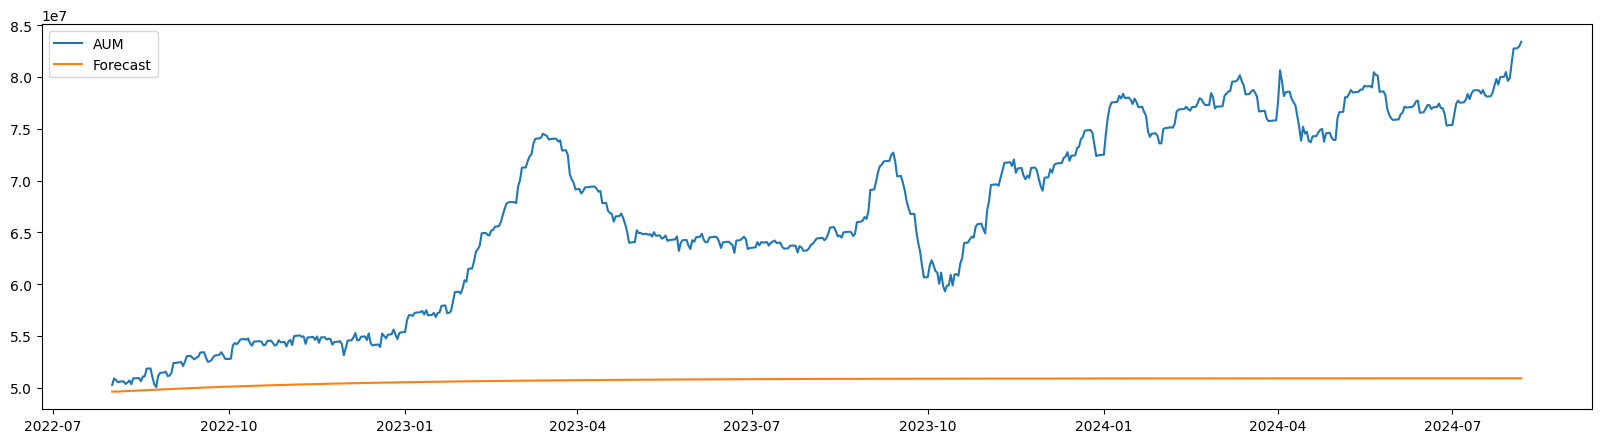

In [76]:
# Graficar la serie de prueba con las predicciones


plt.figure(figsize=(20,5))

plt.plot(test['AUM FIC'])

plt.plot(fcast)

plt.legend(['AUM','Forecast'])

Vemos que el modelo no se ajusta bien a los datos y por tanto no predice bien, ya que al ser una serie no estacionaria un modelo autorregresivo no tiene un buen rendimiento.

### Medias Móviles

Con un retraso

In [77]:
model_ma_1 = ARIMA(df_principal['AUM FIC'],order=(0,0,1))

results_ma_1 = model_ma_1.fit()

print(results_ma_1.summary())

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 1)   Log Likelihood              -41321.673
Date:                Sat, 17 Aug 2024   AIC                          82649.345
Time:                        12:37:02   BIC                          82666.707
Sample:                    01-01-2018   HQIC                         82655.660
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   8.77e-12   6.42e+18      0.000    5.63e+07    5.63e+07
ma.L1          0.9758      0.013     75.502      0.000       0.951       1.001
sigma2      9.526e+13   2.04e-18   4.66e+31      0.0

Con dos retrasos

In [78]:
model_ma_2 = ARIMA(df_principal['AUM FIC'],order=(0,0,2))

results_ma_2 = model_ma_2.fit()

print(results_ma_2.summary())

print(f'\n REsultado LLR Test : {LLR_test(results_ma_1,results_ma_2)}')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 2)   Log Likelihood              -41108.518
Date:                Sat, 17 Aug 2024   AIC                          82225.035
Time:                        12:37:02   BIC                          82248.185
Sample:                    01-01-2018   HQIC                         82233.455
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   2.86e-11   1.97e+18      0.000    5.63e+07    5.63e+07
ma.L1          1.6217      0.084     19.326      0.000       1.457       1.786
ma.L2          0.8959      0.084     10.672      0.0

Este modelo predice mejor que el modelo de un retraso.

**Con tres retrasos**

In [79]:
model_ma_3 = ARIMA(df_principal['AUM FIC'],order=(0,0,3))

results_ma_3 = model_ma_3.fit()

print(results_ma_3.summary())

print(f'\n REsultado LLR Test : {LLR_test(results_ma_2,results_ma_3)}')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 3)   Log Likelihood              -41042.661
Date:                Sat, 17 Aug 2024   AIC                          82095.322
Time:                        12:37:02   BIC                          82124.259
Sample:                    01-01-2018   HQIC                         82105.847
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   1.09e-08   5.15e+15      0.000    5.63e+07    5.63e+07
ma.L1          2.0609      0.290      7.114      0.000       1.493       2.629
ma.L2          1.8987      0.470      4.038      0.0

Este modelo predice mejor que el modelo de dos retrasos. Aunque vale la pena resaltar que los residuos están correlacionados.

**Con 4 retrasos**

In [80]:
model_ma_4 = ARIMA(df_principal['AUM FIC'],order=(0,0,4))

results_ma_4 = model_ma_4.fit()

print(results_ma_4.summary())

print(f'\n REsultado LLR Test : {LLR_test(results_ma_3,results_ma_4)}')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 4)   Log Likelihood              -41017.491
Date:                Sat, 17 Aug 2024   AIC                          82046.983
Time:                        12:37:03   BIC                          82081.707
Sample:                    01-01-2018   HQIC                         82059.613
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   3.56e-08   1.58e+15      0.000    5.63e+07    5.63e+07
ma.L1          2.1731      0.474      4.589      0.000       1.245       3.101
ma.L2          2.5391      0.890      2.855      0.0

Este modelo predice mejor que el modelo de tres retrasos. Aunque vale la pena resaltar que los residuos están correlacionados.

**Con 5 retrasos**

In [81]:
model_ma_5 = ARIMA(df_principal['AUM FIC'],order=(0,0,5))

results_ma_5 = model_ma_5.fit()

print(results_ma_5.summary())

print(f'\n REsultado LLR Test : {LLR_test(results_ma_4,results_ma_5)}')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 5)   Log Likelihood              -41003.227
Date:                Sat, 17 Aug 2024   AIC                          82020.454
Time:                        12:37:03   BIC                          82060.965
Sample:                    01-01-2018   HQIC                         82035.189
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   7.68e-08   7.34e+14      0.000    5.63e+07    5.63e+07
ma.L1          2.1502      0.697      3.083      0.002       0.783       3.517
ma.L2          2.8253      1.287      2.195      0.0

Incluir un coeficiente más no ayuda, puesto que no es significativo

**Con 6  retrasos**

In [82]:
model_ma_6 = ARIMA(df_principal['AUM FIC'],order=(0,0,6))

results_ma_6 = model_ma_6.fit()

print(results_ma_6.summary())

print(f'\n REsultado LLR Test : {LLR_test(results_ma_5,results_ma_6)}')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 6)   Log Likelihood              -40993.236
Date:                Sat, 17 Aug 2024   AIC                          82002.472
Time:                        12:37:04   BIC                          82048.771
Sample:                    01-01-2018   HQIC                         82019.312
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   7.66e-08   7.36e+14      0.000    5.63e+07    5.63e+07
ma.L1          2.0432      0.893      2.289      0.022       0.294       3.793
ma.L2          2.7822      1.514      1.837      0.0

Con 6 retrasos, tampoco es un modelo significativo

**Con 7 retrasos**

In [83]:
model_ma_7 = ARIMA(df_principal['AUM FIC'],order=(0,0,7))

results_ma_7= model_ma_7.fit()

print(results_ma_7.summary())

print(f'\n REsultado LLR Test : {LLR_test(results_ma_6,results_ma_7)}')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 7)   Log Likelihood              -40984.886
Date:                Sat, 17 Aug 2024   AIC                          81987.772
Time:                        12:37:05   BIC                          82039.858
Sample:                    01-01-2018   HQIC                         82006.717
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07    1.2e-07    4.7e+14      0.000    5.63e+07    5.63e+07
ma.L1          1.9872      1.036      1.917      0.055      -0.044       4.019
ma.L2          2.7796      1.758      1.581      0.1

Con 7 retrasos, no es significativo el modelo

**Con 8 retrasos**

In [84]:
model_ma_8 = ARIMA(df_principal['AUM FIC'],order=(0,0,8))

results_ma_8= model_ma_8.fit()

print(results_ma_8.summary())

print(f'\n REsultado LLR Test : {LLR_test(results_ma_7,results_ma_8)}')

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -40976.440
Date:                Sat, 17 Aug 2024   AIC                          81972.880
Time:                        12:37:06   BIC                          82030.754
Sample:                    01-01-2018   HQIC                         81993.930
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   1.27e-07   4.42e+14      0.000    5.63e+07    5.63e+07
ma.L1          1.9209      1.247      1.541      0.123      -0.522       4.364
ma.L2          2.7022      2.081      1.299      0.1

Y por último con 8 retrasos el modelo no es significativo, por tanto se trabajará con el modelo que involucra el coeficiente para 4 retrasos.

In [85]:
model_ma = ARIMA(train,order=(0,0,4))

results_ma = model_ma.fit()

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [86]:
start = len(train)

end = len(train) + len(test) - 1

rename = f'MA(4) Predictions'

fcast_ma = results_ma.predict(start = start, end = end).rename(rename)

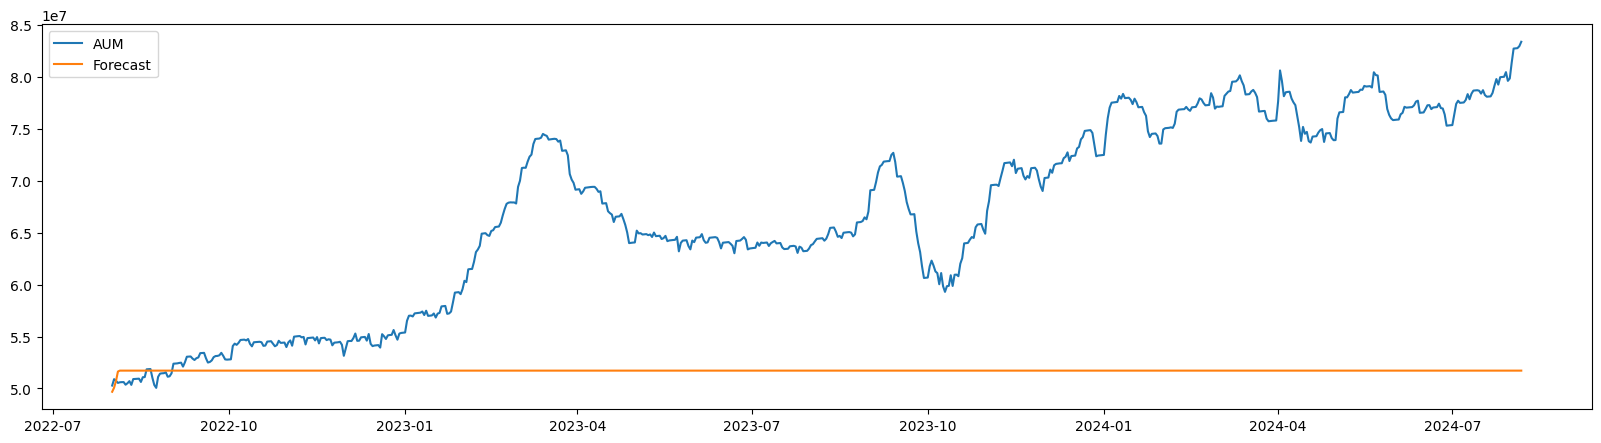

In [87]:
# Graficar la serie de prueba con las predicciones

plt.figure(figsize=(20,5))

plt.plot(test['AUM FIC'])

plt.plot(fcast_ma)

plt.legend(['AUM','Forecast'])

La capacidad de predicción mejora, aunque a nivel general los valores predichos se encuentran por debajo de los valores reales. 

## ARMA

In [88]:
model_arma_1 = ARIMA(df_principal['AUM FIC'],order=(1,0,1))

results_arma_1 = model_arma_1.fit()

print(results_arma_1.summary())

                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 2410
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -34779.921
Date:                Sat, 17 Aug 2024   AIC                          69567.842
Time:                        12:37:06   BIC                          69590.992
Sample:                    01-01-2018   HQIC                         69576.262
                         - 08-06-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.634e+07   2.99e-13   1.88e+20      0.000    5.63e+07    5.63e+07
ar.L1          0.9999      0.000   3675.785      0.000       0.999       1.000
ma.L1          0.1495      0.009     16.696      0.0

In [89]:
LLR_test(results_ar,results_arma_1)

0.0

In [90]:
LLR_test(results_ma_1,results_arma_1)

0.0

In [91]:
model_arma_2 = ARIMA(train['AUM FIC'],order=(4,0,2))

results_arma_2 = model_arma_2.fit()

print(results_arma_2.summary())

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                AUM FIC   No. Observations:                 1673
Model:                 ARIMA(4, 0, 2)   Log Likelihood              -23972.839
Date:                Sat, 17 Aug 2024   AIC                          47961.678
Time:                        12:37:08   BIC                          48005.057
Sample:                    01-01-2018   HQIC                         47977.750
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.172e+07      2e-09   2.59e+16      0.000    5.17e+07    5.17e+07
ar.L1          0.9588      0.128      7.497      0.000       0.708       1.209
ar.L2          0.9315      0.202      4.621      0.0

C:\Users\OmarAndresMontanezMu\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [92]:
start = len(train)

end = len(train) + len(test) - 1

rename = f'ARMA(5,2) Predictions'

fcast_arma = results_arma_2.predict(start = start, end = end,dynamic=False).rename(rename)

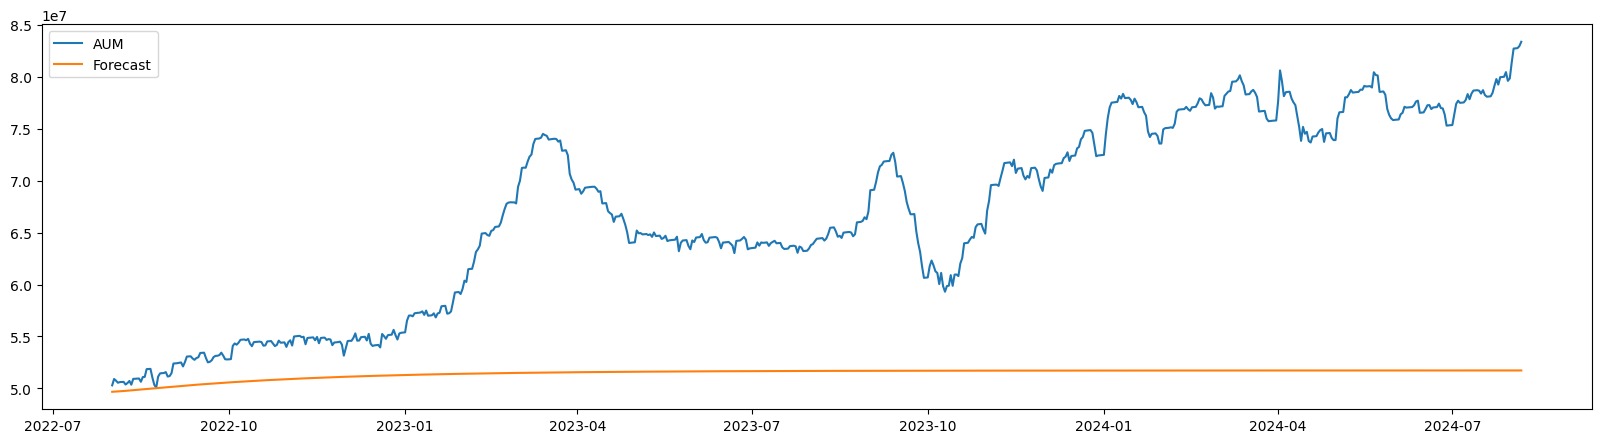

In [93]:
# Graficar la serie de prueba con las predicciones

plt.figure(figsize=(20,5))

plt.plot(test)

plt.plot(fcast_arma)

plt.legend(['AUM','Forecast'])

plt.show()

##  ARIMA

In [94]:
import itertools

import numpy as np

import warnings

warnings.filterwarnings("ignore")

Encontrar los mejores valores para p, d y q

In [95]:
# p=d=q = range(0,7)

# pdq = list(itertools.product(p, d, q))

In [96]:
# # Función para encontrar el mejor modelo ARIMA basado en AIC
# def find_best_arima_model(ts, pdq):
#     best_aic = np.inf
#     best_pdq = None
#     best_model = None

#     for param in pdq:
#         try:
#             model = ARIMA(train['AUM FIC'], order=param)
#             results = model.fit()
#             if results.aic < best_aic:
#                 best_aic = results.aic
#                 best_pdq = param
#                 best_model = results
#         except:
#             continue
    
#     return best_pdq, best_model

# best_pdq, best_model = find_best_arima_model(train['AUM FIC'], pdq)

# print(f'Mejor AIC: {best_model.aic}')
# print(f'Mejor orden (p, d, q): {best_pdq}')
# print(best_model.summary())


# Diagnóstico de los residuos
# residuals = best_model.resid

In [97]:
# plt.figure(figsize=(12, 6))
# plt.plot(residuals[1:])
# plt.title('Residuos del Mejor Modelo ARIMA')
# plt.show()

Definir el mejor modelo

In [98]:
model_arima_1 = ARIMA(train['AUM FIC'],order=(4,0,5))

results_arima_1 = model_arima_1.fit()

In [99]:
start = len(train)

end = len(train) + len(test) - 1

rename = f'ARIMA(3,5,6) Predictions'

fcast_arima = results_arima_1.predict(start =start, end = end ,dynamic=False).rename(rename)

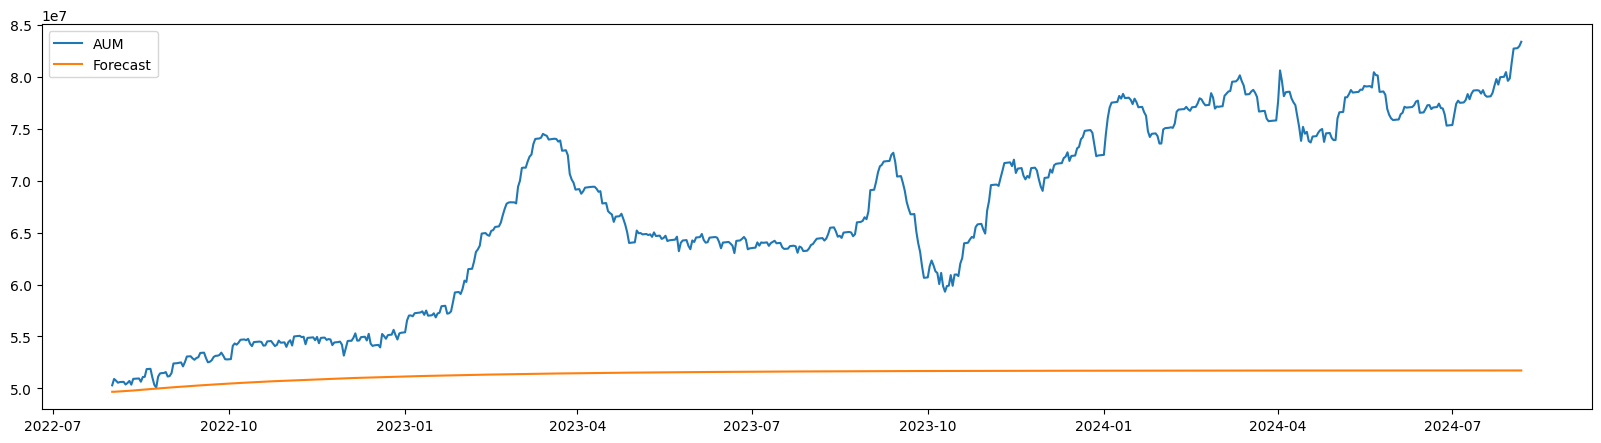

In [100]:
# Graficar la serie de prueba con las predicciones

plt.figure(figsize=(20,5))

plt.plot(test['AUM FIC'])

plt.plot(fcast_arima)

plt.legend(['AUM','Forecast'])

plt.show()


## SARIMA

In [101]:
def evaluate_sarima_model(train, test, order, seasonal_order):
    
    # Ajustar el modelo SARIMA
    
    model = ARIMA(train, order= order, seasonal_order=seasonal_order)
    
    fit_model = model.fit()
    
    # Realizar predicciones
    
    pred = fit_model.forecast(steps=len(test))
    
    # Calcular el error de predicción
    mse = mean_squared_error(test, pred)

    return mse

Encontrar la mejor combinación de P,D,Q,s

In [102]:
# P = D = Q = range(0, 2)

# s = [30]

# seasonal_order_combinations = list(itertools.product(P, D, Q,s))

In [103]:
# # Realizar la búsqueda en el grid
# best_score, best_params = float('inf'), None

# for seasonal_order in seasonal_order_combinations:
#     try:
#         mse = evaluate_sarima_model(train['AUM FIC'], test['AUM FIC'], (3,5,6), seasonal_order)
#         if mse < best_score:
#             best_score, best_params = mse, (seasonal_order)
#     except:
#         continue

# print(f'Mejor modelo SARIMA: Orden=(4,0,5), Orden estacional={best_params}, MSE={best_score}')

In [104]:
model_sarima = ARIMA(train['AUM FIC'],order=(4,0,5), seasonal_order=(0,0,1,30))

results_sarima = model_sarima.fit()

print(results_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            AUM FIC   No. Observations:                 1673
Model:             ARIMA(4, 0, 5)x(0, 0, [1], 30)   Log Likelihood              -23967.149
Date:                            Sat, 17 Aug 2024   AIC                          47958.297
Time:                                    12:37:30   BIC                          48023.366
Sample:                                01-01-2018   HQIC                         47982.405
                                     - 07-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.172e+07   6.58e-08   7.86e+14      0.000    5.17e+07    5.17e+07
ar.L1          1.4999      0.550   

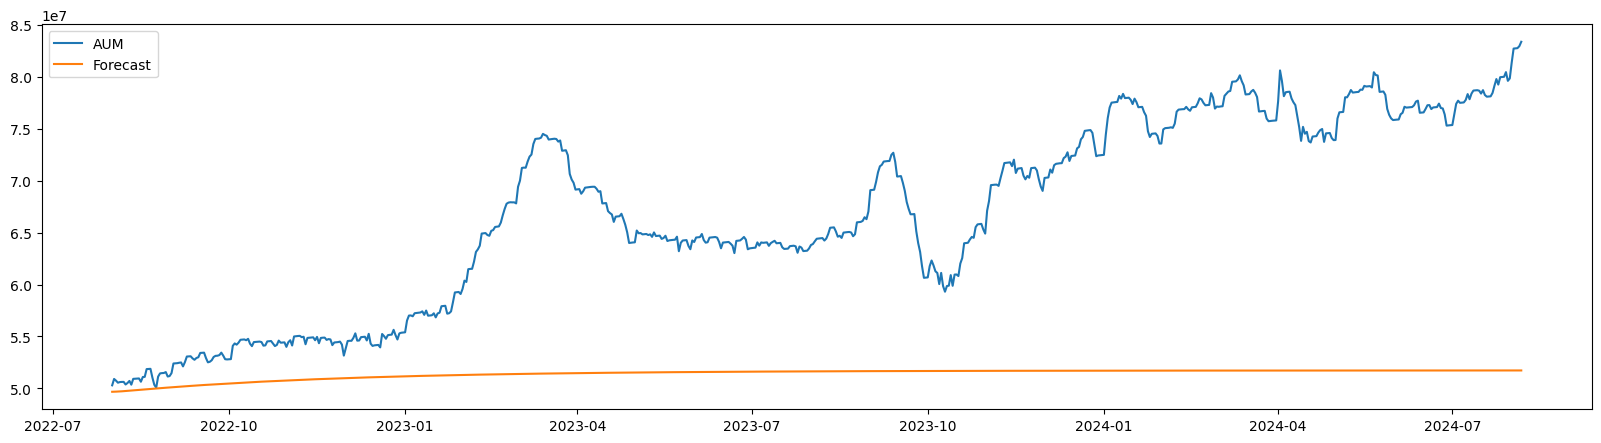

In [105]:
start = len(train)

end = len(train) + len(test) - 1

rename = f'SARIMA Predictions'

fcast_sarima = results_sarima.predict(start =start, end = end ,dynamic=False).rename(rename)

# Graficar la serie de prueba con las predicciones

plt.figure(figsize=(20,5))

plt.plot(test)

plt.plot(fcast_sarima)

plt.legend(['AUM','Forecast'])

plt.show()

## SARIMAX

Veamos como se comporta la variable efectivo

In [106]:
exogenas = df[['AUM FIC','Cuentas de ahorro','Efectivo']]

In [107]:
scaler = StandardScaler()

exogenas_escaladas = scaler.fit_transform(exogenas[['Cuentas de ahorro','Efectivo']])

exogenas[['Cuentas de ahorro','Efectivo']] = exogenas_escaladas

In [108]:
train = exogenas.iloc[:1673]

test = exogenas.iloc[1673:]

In [109]:
model_arimax = ARIMA(train['AUM FIC'],exog=train[['Cuentas de ahorro','Efectivo']], order=(4,0,5),seasonal_order=(0,0,1,30))

results_arimax = model_arimax.fit()

print(results_arimax.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            AUM FIC   No. Observations:                 1673
Model:             ARIMA(4, 0, 5)x(0, 0, [1], 30)   Log Likelihood              -25049.860
Date:                            Sat, 17 Aug 2024   AIC                          50127.719
Time:                                    12:37:51   BIC                          50203.633
Sample:                                01-01-2018   HQIC                         50155.845
                                     - 07-31-2022                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5.422e+07    1.5e-07   3.61e+14      0.000    5.42e+07    5.42e+07
Cuentas de aho

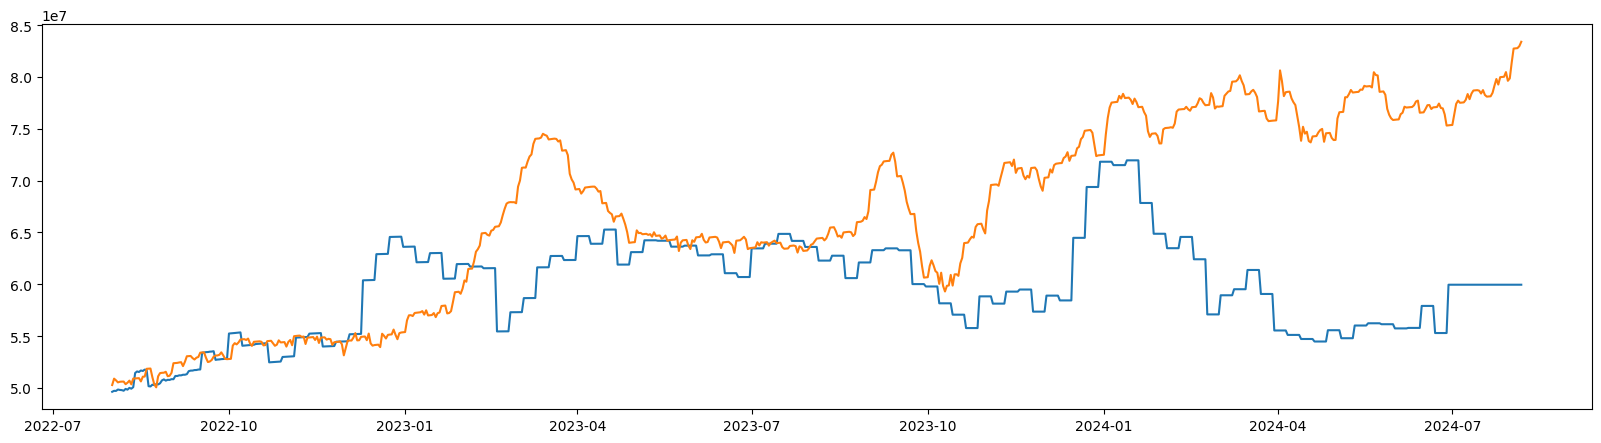

In [110]:
start = len(train)

end = len(train) + len(test) - 1

rename = f'ARIMAX Predictions'

fcast_arimax = results_arimax.predict(start = start, end = end ,exog =  test[['Cuentas de ahorro','Efectivo']] ,dynamic=False).rename(rename)

# Graficar la serie de prueba con las predicciones

plt.figure(figsize=(20,5))

plt.plot(fcast_arimax)

plt.plot(test['AUM FIC'])

plt.show()

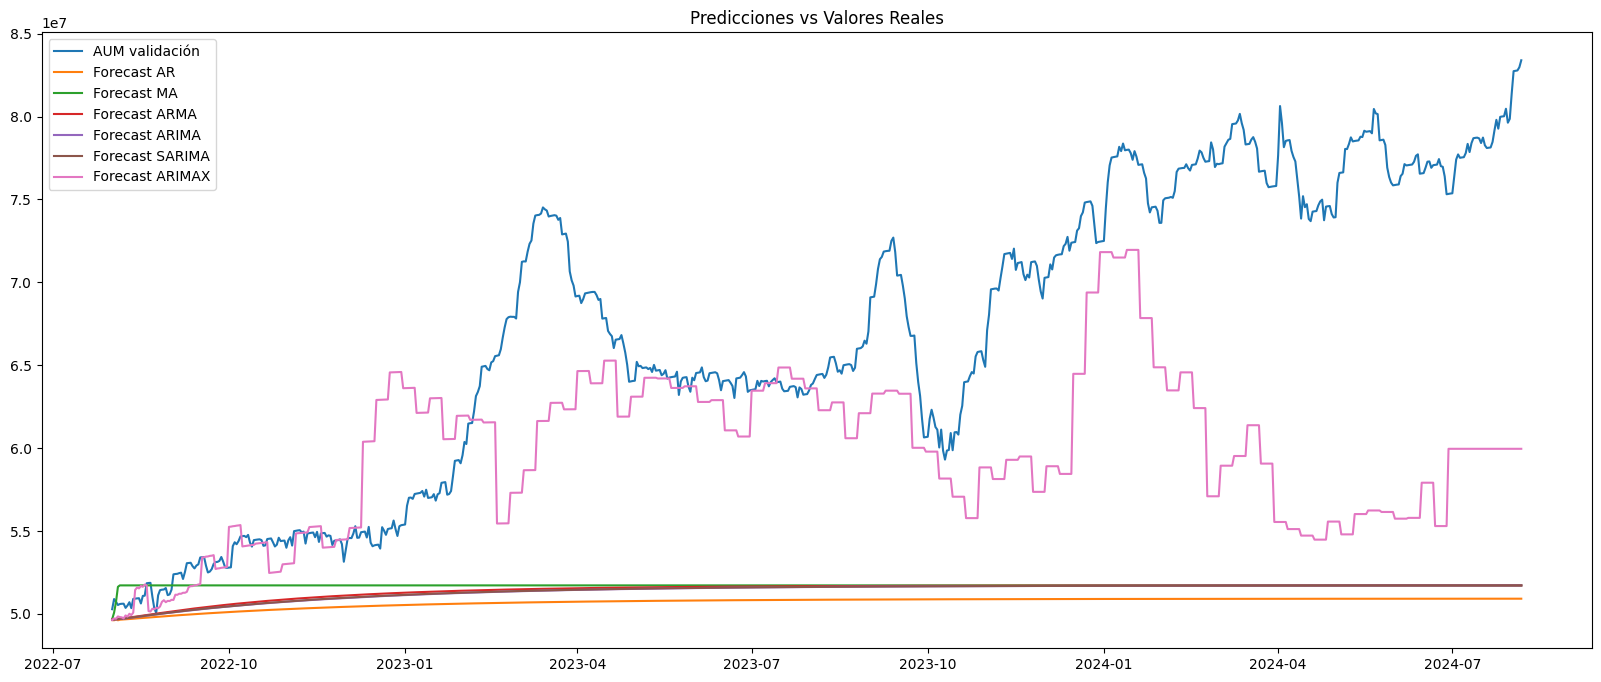

In [111]:
plt.figure(figsize=(20,8))

# plt.plot(df_principal,label = 'AUM FIC')

plt.plot(test['AUM FIC'],label = 'AUM validación')

plt.plot(fcast,label = 'Forecast AR')

plt.plot(fcast_ma,label = 'Forecast MA')

plt.plot(fcast_arma,label = 'Forecast ARMA')

plt.plot(fcast_arima,label = 'Forecast ARIMA')

plt.plot(fcast_sarima,label = 'Forecast SARIMA')

plt.plot(fcast_arimax,label = 'Forecast ARIMAX')

plt.title('Predicciones vs Valores Reales')

plt.legend()

plt.show()

In [112]:
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, mape

In [113]:
metricas_ar = calculate_metrics(fcast,test['AUM FIC'])

metricas_ma = calculate_metrics(fcast_ma,test['AUM FIC'])

metricas_arma = calculate_metrics(fcast_arma,test['AUM FIC'])

metricas_arima =  calculate_metrics(fcast_arima,test['AUM FIC'])

metricas_sarima = calculate_metrics(fcast_sarima,test['AUM FIC'])

metricas_sarimax = calculate_metrics(fcast_arimax,test['AUM FIC'])

In [114]:
# Comparar resultados
resultados = pd.DataFrame({
    'Model': ['AR', 'MA', 'ARMA','ARIMA','SARIMA','SARIMAX',],
    'MSE': [metricas_ar[0], metricas_ma[0],metricas_arma[0],metricas_arima[0],metricas_sarima[0],metricas_sarimax[0]],
    'RMSE': [metricas_ar[1], metricas_ma[1],metricas_arma[1],metricas_arima[1],metricas_sarima[1],metricas_sarimax[1]],
    'MAE': [metricas_ar[2], metricas_ma[2],metricas_arma[2],metricas_arima[2],metricas_sarima[2],metricas_sarimax[2]],
    'MAPE': [metricas_ar[3], metricas_ma[3],metricas_arma[3],metricas_arima[3],metricas_sarima[3],metricas_sarimax[3]]
})

resultados

,Model,MSE,RMSE,MAE,MAPE
0,AR,3.377234e+14,1.837725e+07,1.614343e+07,31.756817
1,MA,3.102769e+14,1.761468e+07,1.518717e+07,29.364158
2,ARMA,3.125608e+14,1.767939e+07,1.540471e+07,29.833501
3,ARIMA,3.137532e+14,1.771308e+07,1.546353e+07,29.970877
4,SARIMA,3.136288e+14,1.770957e+07,1.545716e+07,29.956068
5,SARIMAX,1.249705e+14,1.117902e+07,8.205364e+06,13.933064
